<a href="https://colab.research.google.com/github/suraksha011/MLModel/blob/main/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
train= pd.read_csv('ambi_dataset.csv', encoding='latin1')
print(train.shape)

(39963, 24)


In [ ]:
train.head(5)

,id,word,bigram1,bigram2,bigram2prob,trigram1,trigram1prob,trigram2,trigram2prob,posplus1,...,posminus3,gram4_1,gram4_1prob,sentenceID,fileid,gram4_2,gram4_2prob,sentence,bigram1prob,sence
0,75025,???,?? ???,??? ??,0.500000,?? ?? ???,0.090909,??? ?? ?????,1.0,PSP,...,VAUX,??? ?? ?? ???,1.0,147,31,??? ?? ????? ??,1.0,?????? ???? ??? ?? ?? ??? ?? ????? ?? ????????...,0.003317,???2
1,74999,???,???????? ???,??? ??,1.000000,?? ???????? ???,1.000000,??? ?? ???,1.0,PSP,...,NN,??? ?? ???????? ???,1.0,145,31,??? ?? ??? ??????????,1.0,?? ??? ?? ???????? ??? ?? ??? ?????????? ?? ??...,0.250000,???1
2,59681,?????,?? ?????,????? ????,1.000000,?? ?? ?????,1.000000,????? ???? ??,1.0,NN,...,NN,??????? ?? ?? ?????,1.0,140,11,????? ???? ?? ????,1.0,??????? ??????? ?? ??????? ?? ?? ????? ???? ??...,0.005222,?????2
3,60500,?????,?? ?????,????? ????,1.000000,?? ?? ?????,1.000000,????? ???? ??,1.0,NN,...,NN,??????? ?? ?? ?????,1.0,139,12,????? ???? ?? ????,1.0,??????? ??????? ?? ??????? ?? ?? ????? ???? ??...,0.005222,?????1
4,70656,???????,?????? ???????,??????? ????,0.222222,?? ?????? ???????,1.000000,??????? ???? ????,1.0,NEG,...,PSP,?? ?? ?????? ???????,1.0,114,26,??????? ???? ???? ???,1.0,????? ???? 20-30 ????? ?? ???? ????? ?? ?? ???...,0.125000,???????1


In [ ]:
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs[NAs.sum(axis=1)>0]

,Train


In [ ]:
train["id"]=train["id"].fillna(train["id"].mean())

In [ ]:
for col in train.dtypes[train.dtypes == "object"].index:
  for_dummy=train.pop(col)
  train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)],axis=1)
train.head()

,id,bigram2prob,trigram1prob,trigram2prob,gram4_1prob,sentenceID,fileid,gram4_2prob,bigram1prob,word_?,...,sence_????????????2,sence_????????????3,sence_????????????4,sence_????????????5,sence_????????????6,sence_????????????7,sence_????????????8,sence_????????????9,sence_?????????????1,sence_?????????????2
0,75025,0.500000,0.090909,1.0,1.0,147,31,1.0,0.003317,False,...,False,False,False,False,False,False,False,False,False,False
1,74999,1.000000,1.000000,1.0,1.0,145,31,1.0,0.250000,False,...,False,False,False,False,False,False,False,False,False,False
2,59681,1.000000,1.000000,1.0,1.0,140,11,1.0,0.005222,False,...,False,False,False,False,False,False,False,False,False,False
3,60500,1.000000,1.000000,1.0,1.0,139,12,1.0,0.005222,False,...,False,False,False,False,False,False,False,False,False,False
4,70656,0.222222,1.000000,1.0,1.0,114,26,1.0,0.125000,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
labels=train.pop("sence_?????????????2")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(train,labels,test_size=0.4)

In [ ]:
# 1.Random Forest Classifier Model and its graph

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

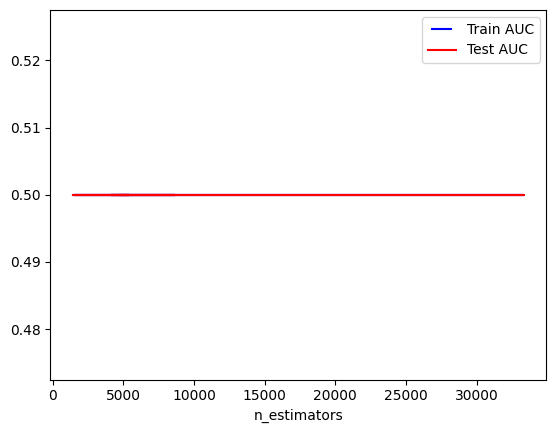

In [ ]:
n_estimators = [1438, 5426,1502, 5507, 8659,4152,4897, 33345,9789,4752]
train_results = []
test_results = []
for estimator in n_estimators:
  rf= RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
  rf.fit(x_train, y_train)
  train_pred =rf.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(x_test)
  false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, =plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel=("AUC score")
plt.xlabel("n_estimators")
plt.show()